In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# How are coefficients affected ? 

When Ridge Regression is applied, the coefficients corresponding to all input columns are affected. As the regularization parameter λ increases (from zero towards positive infinity), all coefficients shrink (decrease) in magnitude.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [3]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET']= data.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=4)

In [7]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())
    ypred = reg.predict(x_test)
    r2_scores.append(r2_score(y_test,ypred))

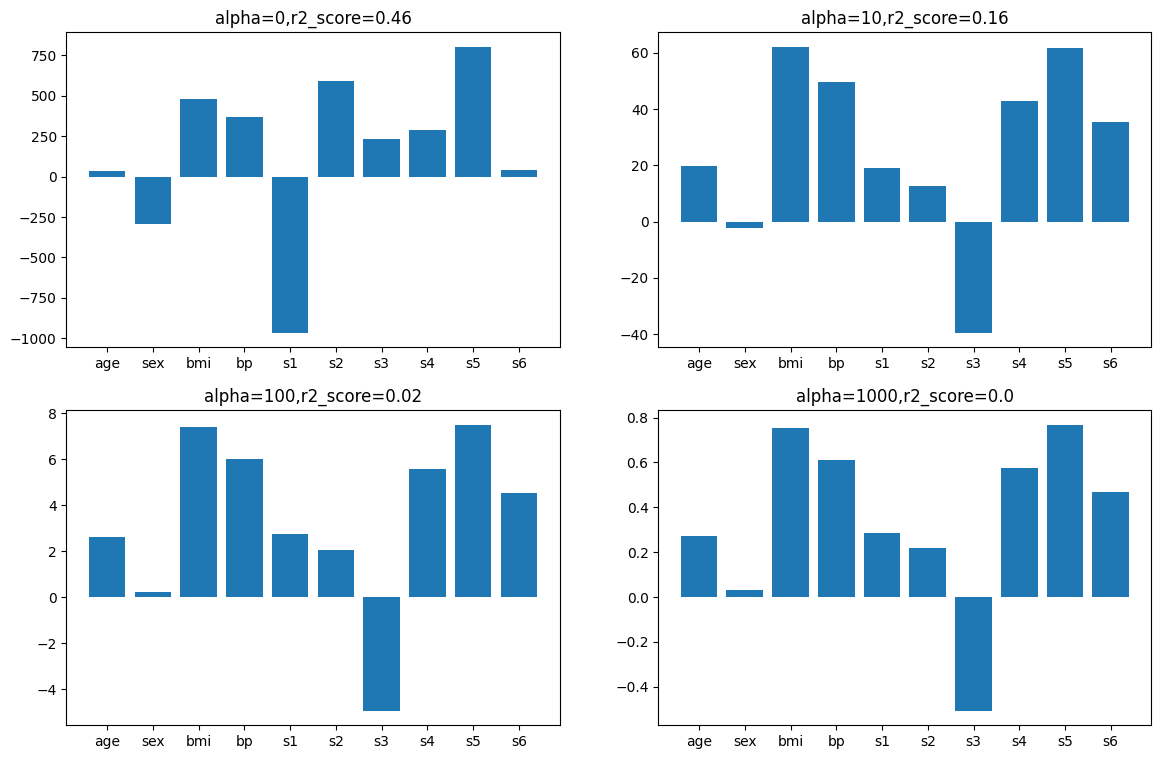

In [8]:
plt.figure(figsize =(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha=0,r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('alpha=10,r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha=100,r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha=1000,r2_score={}'.format(round(r2_scores[3],2)))

plt.show()

# Higher Coefficients are affected more

Regularization does not affect all coefficients equally; the impact is relative to their original magnitude.

• Coefficients that are initially very large (in magnitude, e.g., 5000) are decreased much more strongly and rapidly than coefficients that are small.

• If a coefficient is very large, it will decrease at a faster rate when λ is increased, compared to a coefficient that is not initially large.

In [9]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [10]:
input_array = np.array(coefs)

In [11]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,33.409541,-292.241128,481.080028,369.057161,-966.324639,589.771093,232.598259,288.321647,802.699016,37.813458
0.0001,33.534005,-292.090057,481.233885,368.950642,-953.554577,579.877923,226.710673,286.352989,797.886426,37.773355
0.0010,34.521932,-290.840835,482.401823,368.067875,-852.448721,501.591614,180.111149,270.763353,759.735356,37.491364
0.0100,38.872214,-282.998910,485.047982,362.441022,-419.230221,168.110313,-18.843458,203.843171,594.026885,37.923140
0.1000,44.020634,-241.693300,452.986653,332.044202,-76.336867,-68.521438,-164.988091,149.969081,431.613474,58.518627
1.0000,48.812612,-85.494310,270.226405,201.916048,17.413481,-19.043075,-136.477357,122.265171,247.598463,95.598797
10.0000,19.738169,-2.316503,62.159294,49.546029,18.927164,12.457396,-39.600912,42.819789,61.571158,35.247315
100.0000,2.621511,0.232384,7.390668,5.994492,2.758341,2.061751,-4.949711,5.580060,7.510500,4.547236
1000.0000,0.270749,0.029691,0.754032,0.612825,0.287584,0.217385,-0.507837,0.575190,0.768597,0.468091


In [12]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    
input_array = np.array(coefs).T

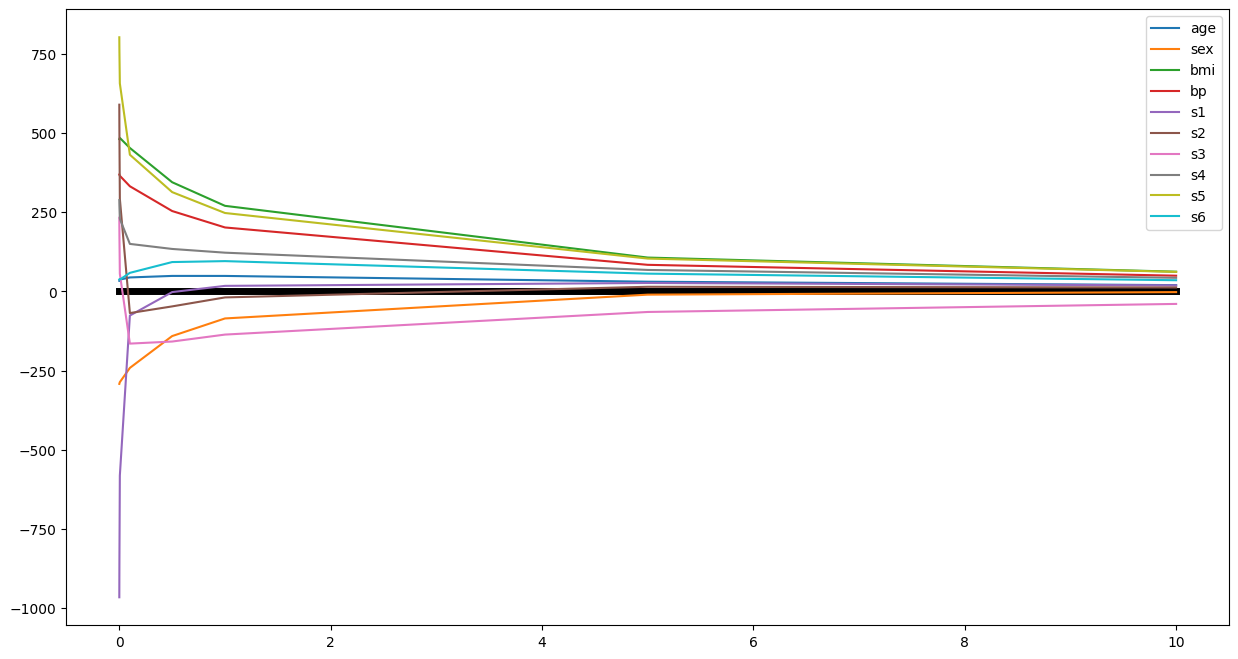

In [13]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

# Impact on Bias and Variance

Regularization is one of the primary techniques used in machine learning to improve the bias-variance trade-off.
The value of λ strongly dictates where a model falls on the bias-variance spectrum.

Selecting the Optimal λ: The goal is to find an appropriate λ that balances this trade-off.

• If you plot bias and variance against λ, you would observe that as λ increases, bias increases, and variance decreases.

• The optimal λ value is often located around the point where the bias and variance curves intersect.

• Ideally, one might choose a value slightly before the intersection point, where the bias is still relatively low and variance is sufficiently reduced. The generalization error is the sum of these two components and typically bottoms out near this ideal λ.


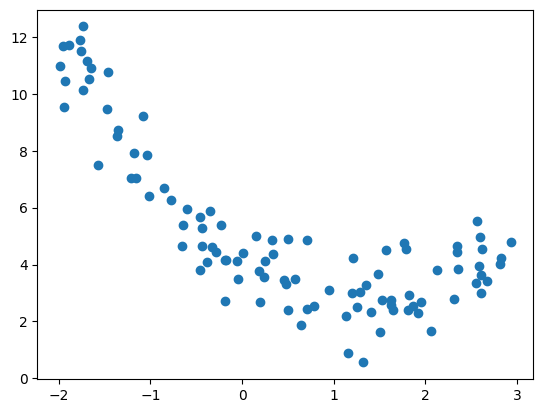

In [14]:
m=100
X= 5*np.random.rand(m,1)-2
y= 0.7*X**2 - 2*X + 4 +np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree =  15)

X_train = pol.fit_transform(X_train)
X_test = pol.transform(X_test)

In [17]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)
loss = []
bias = []
variance =[]

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    avg_expected_loss,avg_bias,avg_variance = bias_variance_decomp(
        reg,X_train,y_train,X_test,y_test,
        loss='mse',random_seed = 123
    )

    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_variance)

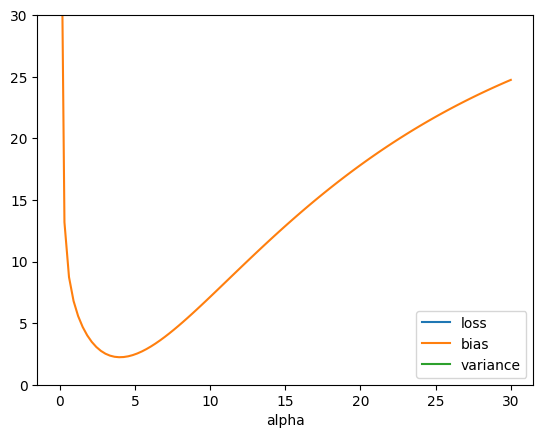

In [18]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.ylim(0,30)
plt.xlabel('alpha')
plt.legend()
plt.show()

# Effect of Regularization on Loss Function

The behavior of the coefficients (Key Point 1) is directly explained by the effect λ has on the loss function itself.

The loss function can be visualized as a curve (in 1D for one coefficient, 'm') or a surface (in 3D for multiple coefficients).
As λ increases:

* The minimum shifts toward zero: The minimum point of the loss function curve moves progressively closer to m=0.
   
* The function becomes steeper/thinner: The curve shrinks and shifts upward.

[27.82809103]
-2.294744558676981


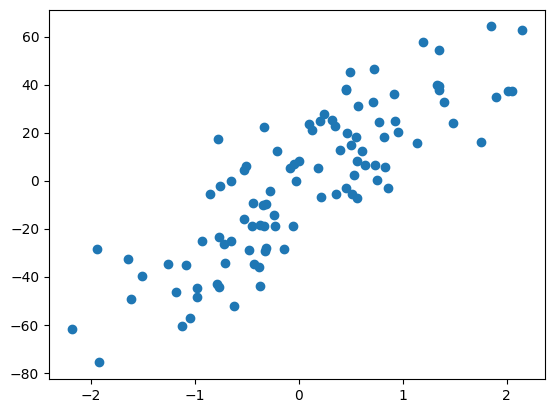

In [19]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [20]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29

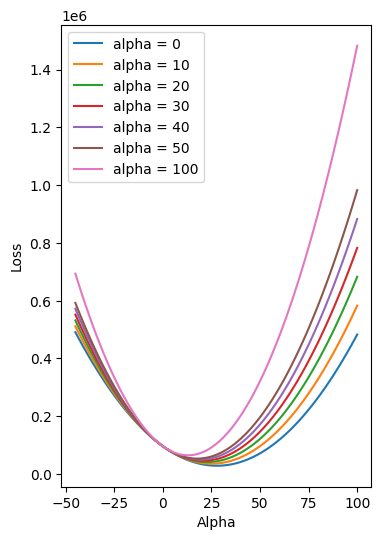

In [21]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

# Why is it called "Ridge" Regression? 

The name "Ridge" regression comes from visualizing the mathematical constraints imposed by the regularization term. This view is based on interpreting the regularization penalty as a "Hard Constraint".
The overall minimization problem involves minimizing two terms simultaneously: the standard MSE loss (the error term) and the regularization term.

* Standard MSE: When plotted in 2D for two coefficients , the MSE loss term typically looks like elliptical contours, with the unregularized solution (OLS solution) located at the center minimum.
  
* Regularization Term : When plotting coefficients that satisfy a maximum allowable penalty (a hard constraint), the L2 norm results in a circular boundary.

The Solution: The final optimized solution for Ridge Regression is found at the very first point where the elliptical MSE contours touch the perimeter of the circular L2 constraint boundary.

Because the solution is always located on the boundary (or periphery/perimeter) of this circle (which represents the L2 norm constraint), the technique is termed Ridge Regression.

![diagram](https://towardsdatascience.com/wp-content/uploads/2019/01/11pHwPfuhgTDFH8elIh_B2g.png)